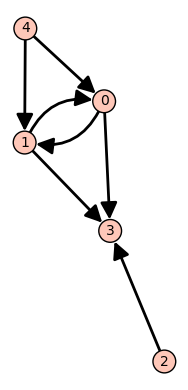

[0, 1, 3]


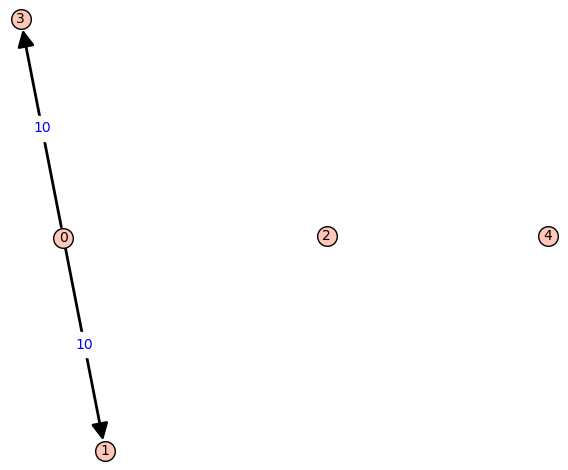

In [4]:
from sage.graphs.digraph import DiGraph
from sage.graphs.digraph_generators import digraphs
from sage.graphs.graph import Graph


def BFS(g: DiGraph, s: int) -> DiGraph:
    bfs = DiGraph(len(g.vertices()))
    c: dict = {}
    for v in g.vertices():
        c[v] = 0

    c[s] = 1
    remains_vertex = [s]

    def get_unvisited_vertex():
        for vertex in g.vertices():
            if c[vertex] == 0:
                return vertex
        return None

    while len(remains_vertex) != 0:
        v = remains_vertex[0]
        remains_vertex.remove(v)
        for neighbor in g.neighbors_out(v):
            if c[neighbor] == 0:
                remains_vertex.append(neighbor)
                bfs.add_edge(v, neighbor)
                bfs.set_edge_label(v, neighbor, 10)
                c[neighbor] = 1

        v = get_unvisited_vertex()
        if len(remains_vertex) == 0 and v is not None:
            remains_vertex.append(v)
            c[v] = 1

    return bfs


def is_eulerian(g: Graph) -> bool:
    for d in g.degree():
        if d == 0 or d % 2 == 1:
            return False
    return True


g = digraphs.RandomDirectedGNP(5,.4)
g.show()


In [ ]:
from models import flowgraph
flowgraph.plot(edge_labels=True)


In [ ]:

from flowgraph import random_flowgraph

g = random_flowgraph(10)
g.plot(edge_labels=True)


S 5
0 1
1 2
1 3
2 3
2 W
3 0
3 2
3 4
4 0
4 2
5 0
5 1
5 2
5 3
5 4


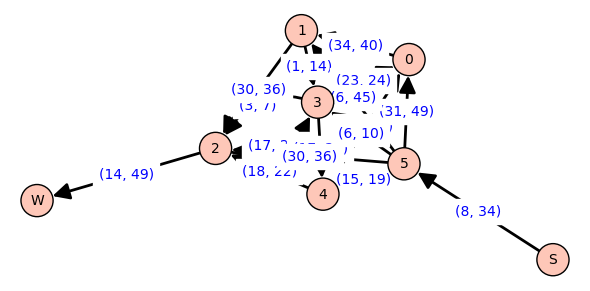

In [37]:
def random_flowgraph(n: int, p: float = 0.5, min_value: int = 5, max_value: int = 50, include_flow: bool = True) \
        -> DiGraph:
    """
    Create a random capacity or flow graph

    :param n: The number of vertices to put in the graph
    :param p: Probability of connection between vertices (excluding well and source)
    :param min_value: The minimum weight of an edge
    :param max_value: The maximum weight of an edge
    :param include_flow: If true, the returned graph will be a flow graph
    :return: A tuple containing the DiGraph, the source and the well
    """
    if n < 5:
        raise Exception("Amount of vertices need to be higher than 5 to be properly done!")
    digraph: DiGraph = digraphs.RandomDirectedGNP(n, p)

    well_potential_dict: dict = {len(list(digraph.neighbors_in(vertex))): vertex for vertex in digraph.vertices()}
    src_potential_dict: dict = {len(list(digraph.neighbors_out(vertex))): vertex for vertex in digraph.vertices()}

    well_attach_vertex = well_potential_dict[max(well_potential_dict.keys())]

    edge_count = max(src_potential_dict.keys())
    src_attach_vertex = src_potential_dict[edge_count]
    while src_attach_vertex == well_attach_vertex:
        del src_potential_dict[edge_count]
        edge_count = max(src_potential_dict.keys())
        src_attach_vertex = src_potential_dict[edge_count]

    digraph.add_vertex('S')
    digraph.add_vertex('W')
    digraph.add_edge('S', src_attach_vertex)
    digraph.add_edge(well_attach_vertex, 'W')
    for u, v, _ in digraph.edges(sort=False):
        print(u, v)
        capacity = random.randint(min_value, max_value)
        digraph.set_edge_label(u, v, (random.randint(0, capacity), capacity) if include_flow else capacity)

    return digraph

g = random_flowgraph(6, p=0.4)
g.plot(edge_labels=True)

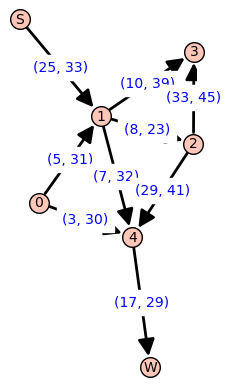

In [47]:
import random

def random_flowgraph(n: int, p: float = 0.5, min_value: int = 5, max_value: int = 50, include_flow: bool = True) \
        -> DiGraph:
    """
    Create a random capacity or flow graph

    :param n: The number of vertices to put in the graph
    :param p: Probability of connection between vertices (excluding well and source)
    :param min_value: The minimum weight of an edge
    :param max_value: The maximum weight of an edge
    :param include_flow: If true, the returned graph will be a flow graph
    :return: A Random flowgraph with 'S' as the source, 'W' as the well
    """
    if n < 5:
        raise Exception("Amount of vertices need to be higher than 5 to be properly done!")
    digraph: DiGraph = digraphs.RandomDirectedGNP(n, p)

    well_potential_dict: dict = {len(list(digraph.neighbors_in(vertex))): vertex for vertex in digraph.vertices()}
    src_potential_dict: dict = {len(list(digraph.neighbors_out(vertex))): vertex for vertex in digraph.vertices()}

    well_attach_vertex = well_potential_dict[max(well_potential_dict.keys())]

    edge_count = max(src_potential_dict.keys())
    src_attach_vertex = src_potential_dict[edge_count]
    while src_attach_vertex == well_attach_vertex:
        del src_potential_dict[edge_count]
        edge_count = max(src_potential_dict.keys())
        src_attach_vertex = src_potential_dict[edge_count]

    digraph.add_vertex('S')
    digraph.add_vertex('W')
    digraph.add_edge('S', src_attach_vertex)
    digraph.add_edge(well_attach_vertex, 'W')
    for u, v, _ in digraph.edges(sort=False):
        capacity = random.randint(min_value, max_value)
        digraph.set_edge_label(u, v, (random.randint(0, capacity), capacity) if include_flow else capacity)
        if (v, u) in digraph.edges(sort=False, labels=False):
            digraph.delete_edge(v, u)
    return digraph


grapheale = random_flowgraph(5)
grapheale.plot(edge_labels=True)


l'arete ('S', 1) a pour label (25, 33)
l'arete (0, 1) a pour label (5, 31)
l'arete (0, 4) a pour label (3, 30)
l'arete (1, 2) a pour label (8, 23)
l'arete (1, 3) a pour label (10, 39)
l'arete (1, 4) a pour label (7, 32)
l'arete (2, 3) a pour label (33, 45)
l'arete (2, 4) a pour label (29, 41)
l'arete (4, 'W') a pour label (17, 29)


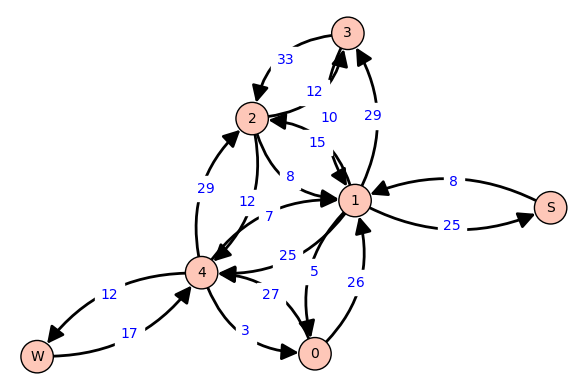

In [48]:
def residual(flow_g: DiGraph):
    residual_g = flow_g.copy()
    for u, v, (flow, capacity) in flow_g.edges(sort=False):
        if flow < capacity:
            residual_g.set_edge_label(u, v, capacity - flow)
            residual_g.add_edge(v, u)
            residual_g.set_edge_label(v, u, flow)
        elif flow == capacity:
            residual_g.delete_edge(u, v)
        print(f"l'arete {(u,v)} a pour label {(flow, capacity)}")
    return residual_g

resg = residual(grapheale)
resg.plot(edge_labels=True)

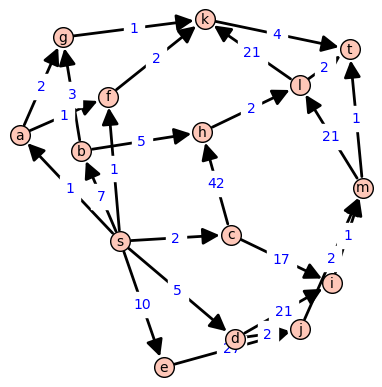

In [8]:
nan = {
    's': {'a': 1, 'b': 7, 'c': 2, 'd': 5, 'e': 10, 'f': 1},
    'a': {'f': 1, 'g': 2},
    'b': {'g': 3, 'h': 5},
    'c': {'h': 42, 'i': 17},
    'd': {'i': 21, 'j': 2},
    'e': {'j': 27},
    'f': {'k': 2},
    'g': {'k': 1},
    'h': {'l': 2},
    'i': {'m': 1},
    'j': {'m': 2},
    'k': {'t': 4},
    'l': {'k': 21, 't': 2},
    'm': {'l': 21, 't': 1}
}
nan = DiGraph(nan, format='dict_of_dicts')
nan.plot(edge_labels=True)
